# Importation des bibliothéques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, curdoc
from bokeh.io import output_notebook
from bokeh.layouts import row, column
from bokeh.models import BoxZoomTool, PanTool, ResetTool, HoverTool, ColumnDataSource
#print(pd.__version__)

# Lecture du csv

In [11]:
fichier = 'parcours.csv'

df = pd.read_csv(fichier,sep=';')

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

x1=df['date']
y1=df['km']
y2=df['Deniv']

In [3]:
# print(df.keys())
# print(df)

# Affichage sous forme de graphique (matplotlib)

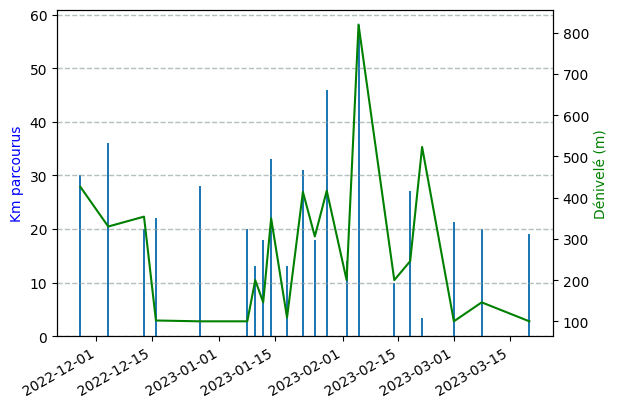

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(x1, y2, 'g-')
ax2.set_ylabel('Dénivelé (m)', color='g')

ax1.bar(x1, y1, width=0.5)
ax1.set_ylabel('Km parcourus', color='b')

plt.xlabel('Date')
ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

# ax1.set_xticklabels(df['date'],rotation=90)
fig.autofmt_xdate()

# Affichage sous forme de graphique (Bokeh)

In [12]:
curdoc().theme = 'dark_minimal'


p1 = figure(title="Distance parcourue",
            x_axis_label="Date", 
            y_axis_label="Distance", 
            x_axis_type='datetime', 
            sizing_mode="stretch_width", 
            height=250,
           )

p2 = figure(title="Dénivelé parcourue", 
            x_axis_label="Date", 
            y_axis_label="Dénivelé", 
            x_axis_type='datetime',
            height=250
           )
src1 = ColumnDataSource(df)

p1.vbar(x='date', top='km', source=src1, legend_label="Distance parcourue (Kilomètre)", color="blue", bottom=0, width=1)
p2.line('date', 'Deniv', source=src1, legend_label="Dénivelé (Mètre)", color="green")
# p2.circle(x1, y2, size=8, color="darkgreen")

hover_tool1 = HoverTool(tooltips=[('Date', '@date{%F}'), ('Distance', '@km')], 
                       formatters={'@date': 'datetime'})

hover_tool2 = HoverTool(tooltips=[('Date', '@date{%F}'), ('Dénivelé', '@Deniv')], 
                       formatters={'@date': 'datetime'})


p1.add_tools(hover_tool1)
p2.add_tools(hover_tool2)

output_notebook()
show(column(p1, p2))

Loading BokehJS ...